# Nome: Leandro Araújo Basílio

### O dataset, a princípio, possuia poucas variáveis e alguns títulos de filmes possuiam poucos votos. Sendo assim, foram empregadas tecnicas de tratamento de dados para retirar os filmes com poucos votos e criar novas variáveis. 

### Aproveitando as novas variáveis, alguns gráficos foram plotados e forneceram algumas informações iniciais, como quais notas médias eram mais frequentes, número de votos por filmes, número de filmes por gêneros, número de votos por gênero etc.

### Posteriormente, análises estatisticas mais específicas nos mostraram que há diferenças significativas entre as notas médias de alguns gêneros. Entretanto, com a amostra utilizada, alguns gêneros não apresentaram p-valor significativo que pudesse dscartar a hipótese nula. Além disso, análises de correlação e gráficos de regressão linear nos mostraram a tendência de alguns gêneros em aumentar ou diminuir o número de votos e a nota média ao longo do tempo e em comparação aos demais gêneros.

### Por fim, pode-se notar, com esse trabalho, a utilidade de ferramentas estatísticas e de computação em análise de dados para inferior ou rejeitar hipóteses, auxiliando em tomadas de decisões.


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [ ]:
!pip install pandas=="0.24.0" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet

In [79]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.4
Usando seaborn 0.10.1
Usando scipy 1.4.1


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [80]:
# solução
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
columns = {'movieId': 'filmeId',
           'title': 'titulo',
           'genres': 'generos'}
filmes.rename(columns=columns, inplace=True)
filmes.set_index('filmeId', inplace=True)


In [81]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [82]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [83]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [84]:
# solução

notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']


In [85]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [86]:
# solução

filmes['nota_media'] = notas.groupby('filmeId').mean().nota


In [87]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [88]:
# solução para calcular o total de votos por filme

notas.filmeId.value_counts()


356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: filmeId, Length: 9724, dtype: int64

In [89]:
# solução para criar a nova coluna e filtrar os filmes

filmes['total_de_votos'] = notas.filmeId.value_counts()
filmes = filmes.query('total_de_votos >= 50')

In [90]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Frequência das notas médias no MovieLens')

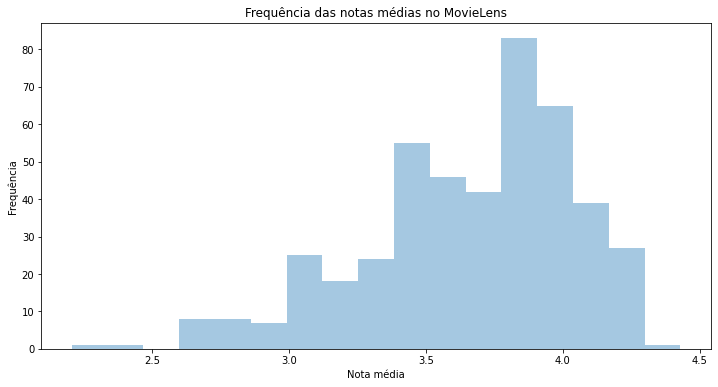

In [91]:
# solução histograma

plt.figure(figsize=(12, 6))

ax = sns.distplot(filmes['nota_media'], norm_hist= False, kde= False)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Frequência das notas médias no MovieLens')

Text(0.5, 1.0, 'Frequência acumulada das notas médias no MovieLens')

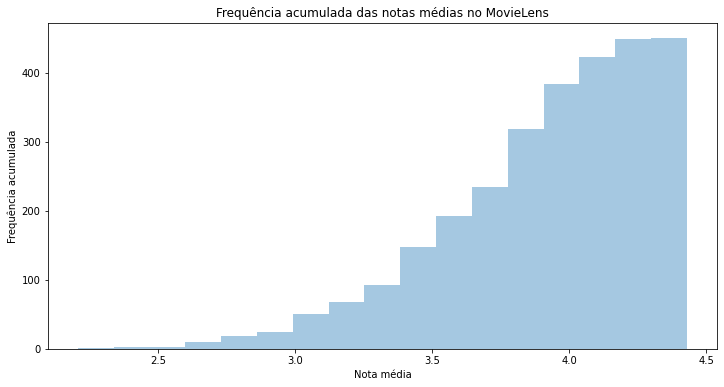

In [92]:
# solução cumulativa

plt.figure(figsize=(12, 6))

ax = sns.distplot(filmes['nota_media'], norm_hist= False, kde= False, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
ax.set(xlabel='Nota média', ylabel='Frequência acumulada')
ax.set_title('Frequência acumulada das notas médias no MovieLens')


## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Quantidade de filmes por N° de votos no MovieLens')

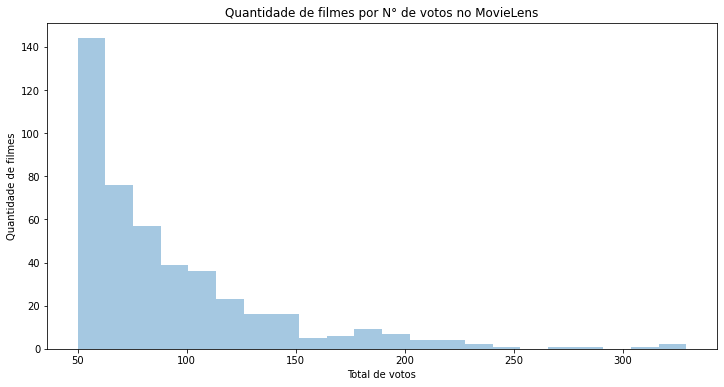

In [93]:
# solução histograma

plt.figure(figsize=(12, 6))

ax = sns.distplot(filmes['total_de_votos'], norm_hist= False, kde= False)
ax.set(xlabel='Total de votos', ylabel='Quantidade de filmes')
ax.set_title('Quantidade de filmes por N° de votos no MovieLens')

Text(0.5, 1.0, 'Quantidade de filme por N° de votos acumulado no MovieLens')

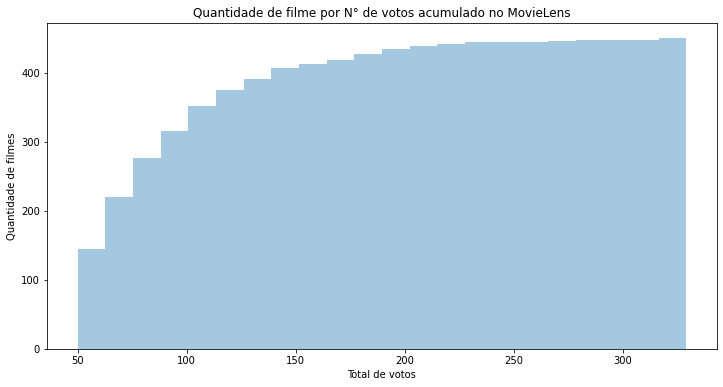

In [94]:
# solução cumulativa

plt.figure(figsize=(12, 6))

ax = sns.distplot(filmes['total_de_votos'], norm_hist= False, kde= False, hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})
ax.set(xlabel='Total de votos', ylabel='Quantidade de filmes')
ax.set_title('Quantidade de filme por N° de votos acumulado no MovieLens')


## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [95]:
# solução

nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)


In [96]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [97]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [98]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

<BarContainer object of 19 artists>

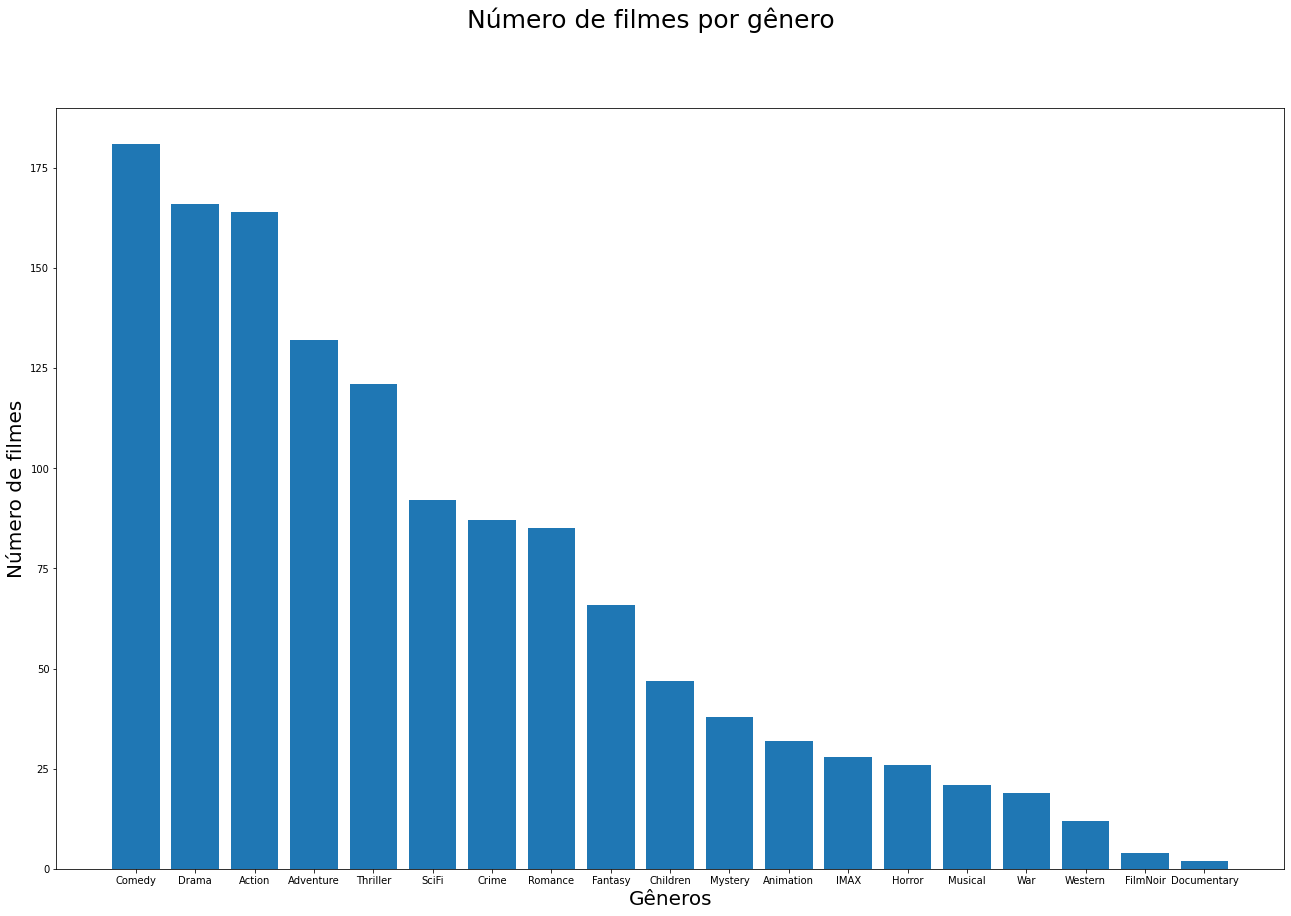

In [99]:
# solução

plt.figure(figsize=(22, 14))
plt.suptitle('Número de filmes por gênero', fontsize=25)
plt.ylabel('Número de filmes', fontsize=20)
plt.xlabel('Gêneros', fontsize=20)

generos_ordenados = generos.sum().sort_values(ascending = False)
plt.bar(x = generos_ordenados.index, height= generos.sum().sort_values(ascending = False))

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [100]:
# solução

top5_generos_em_quantidade_de_filmes = list(generos.sum().sort_values(ascending = False).index[:5])


In [101]:
print(top5_generos_em_quantidade_de_filmes)

['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller']


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [102]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [103]:
# solucão

votos_por_genero = votos_por_genero_por_filme.sum().sort_values(ascending = False)
votos_por_genero


Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

<BarContainer object of 19 artists>

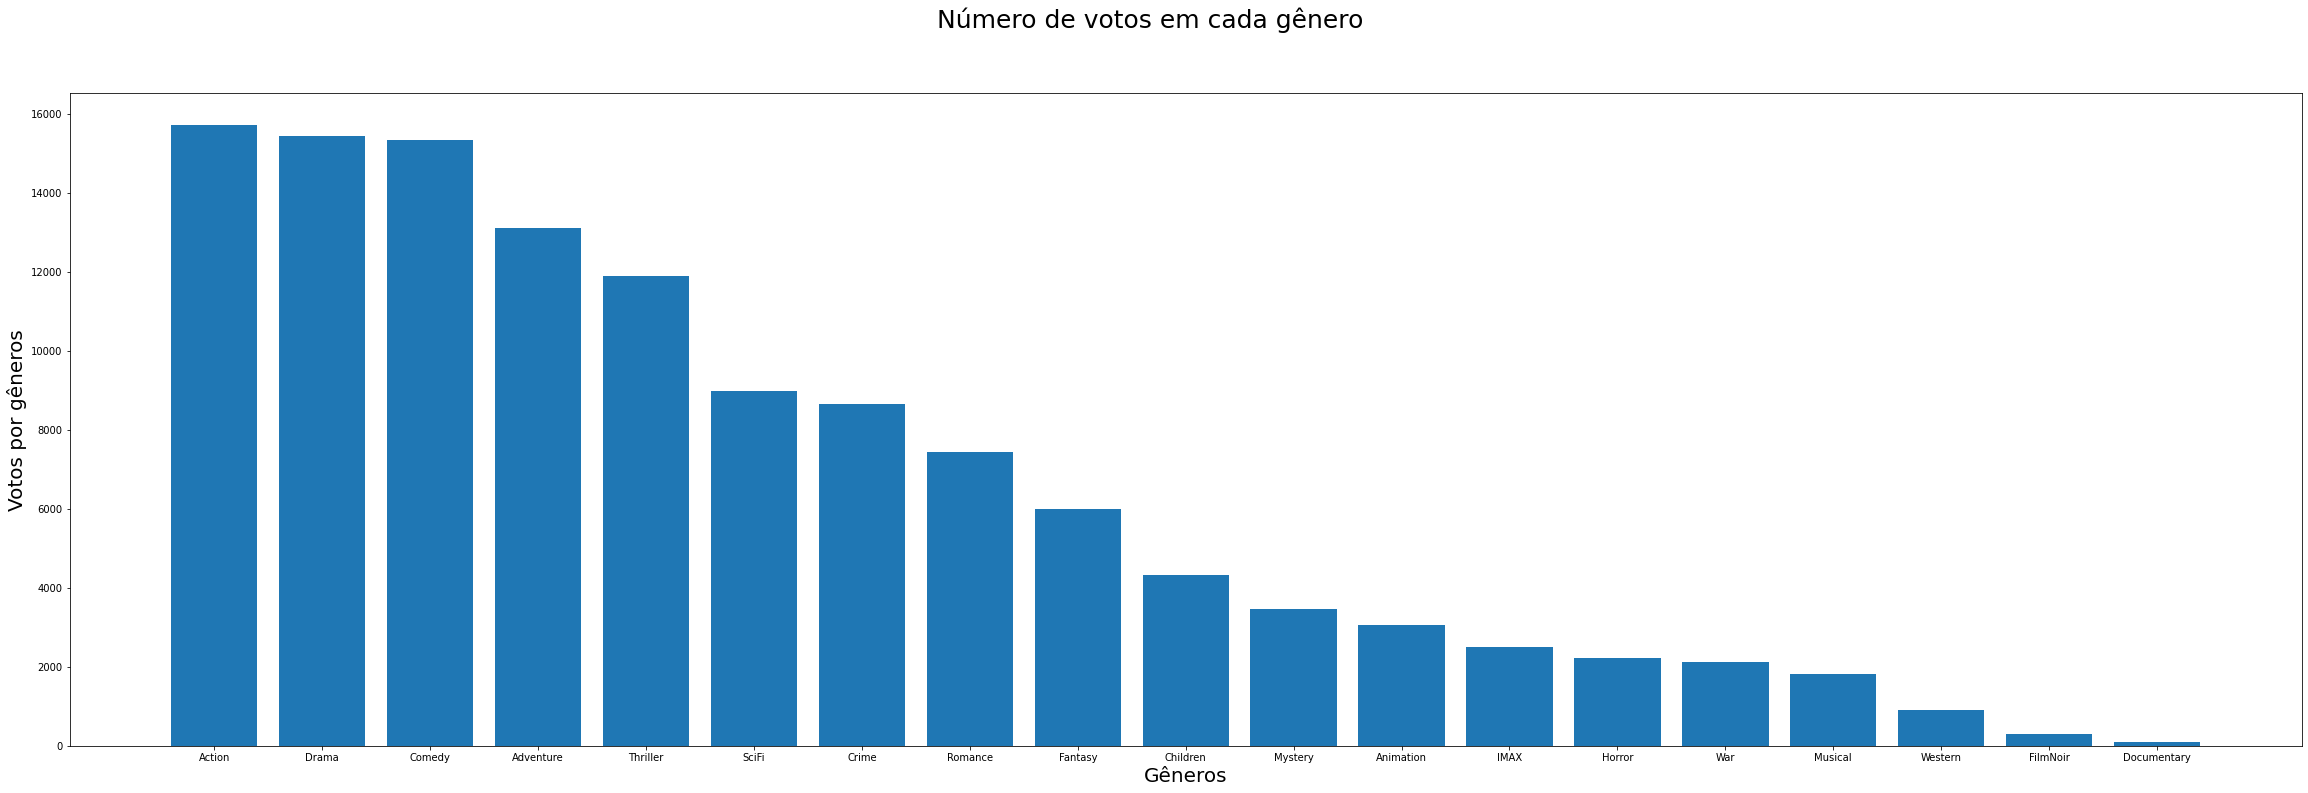

In [104]:
# solução

plt.figure(figsize=(40, 12))
plt.suptitle('Número de votos em cada gênero', fontsize=25)
plt.ylabel('Votos por gêneros', fontsize=20)
plt.xlabel('Gêneros', fontsize=20)

plt.bar(votos_por_genero.keys(), votos_por_genero)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [105]:
# solucao código

votos_por_filme_nos_generos = (votos_por_genero_por_filme.sum()/generos.sum()).sort_values(ascending=False)

<BarContainer object of 19 artists>

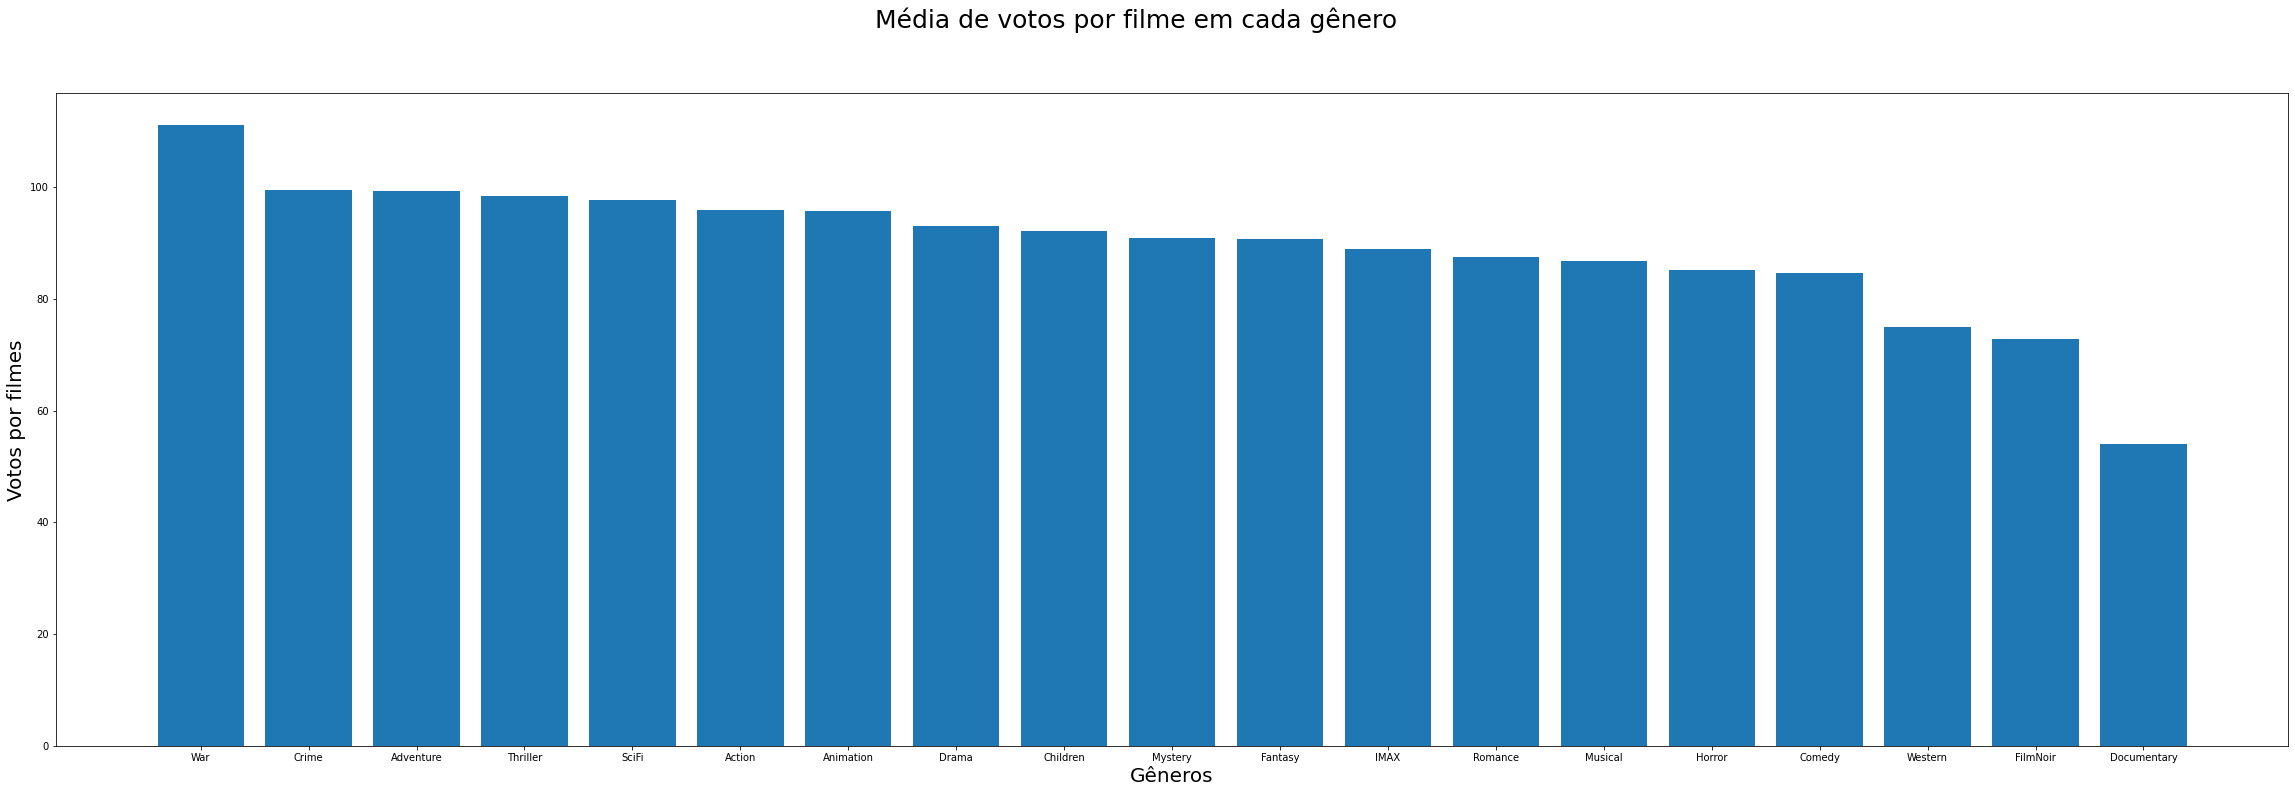

In [106]:
# solução com visualização 

plt.figure(figsize=(40, 12))
plt.suptitle('Média de votos por filme em cada gênero', fontsize=25)
plt.ylabel('Votos por filmes', fontsize=20)
plt.xlabel('Gêneros', fontsize=20)

plt.bar(data = votos_por_filme_nos_generos, x = list(votos_por_filme_nos_generos.index), height = list(votos_por_filme_nos_generos))


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre): Embora o gênero 'Action' tenha mais votos por gênero, o gênero 'War" tem mmais votos por filme.
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

{'boxes': [<matplotlib.lines.Line2D at 0x7efc8760bb70>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc8761a940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efc8762c438>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efc8762c080>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efc8761a160>,
  <matplotlib.lines.Line2D at 0x7efc8762ceb8>]}

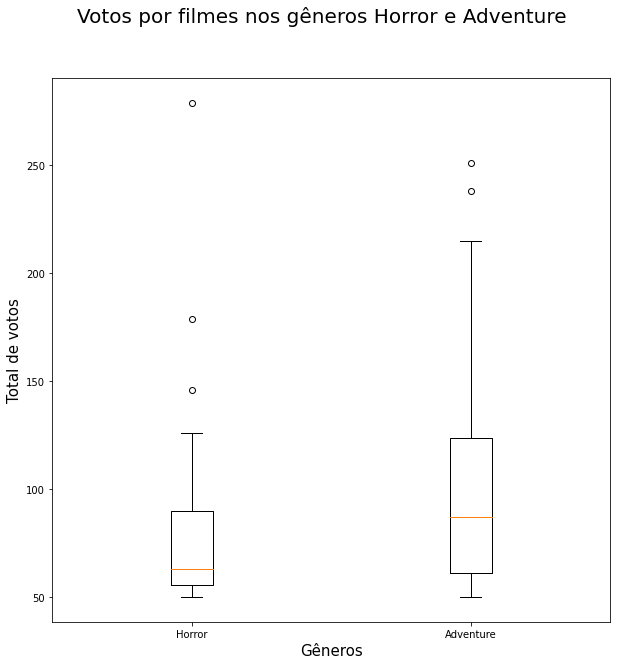

In [107]:
# solução:

plt.figure(figsize=(10, 10))
plt.suptitle('Votos por filmes nos gêneros Horror e Adventure', fontsize = 20)
plt.ylabel('Total de votos', fontsize = 15)
plt.xlabel('Gêneros', fontsize = 15)

horror = filmes.query('Horror == 1')
adventure = filmes.query('Adventure == 1')
plt.boxplot([horror.total_de_votos, adventure.total_de_votos], labels=['Horror', 'Adventure'])

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

{'boxes': [<matplotlib.lines.Line2D at 0x7efc87593860>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc875a02b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efc875a0d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efc875a09b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efc87593ba8>,
  <matplotlib.lines.Line2D at 0x7efc87461320>]}

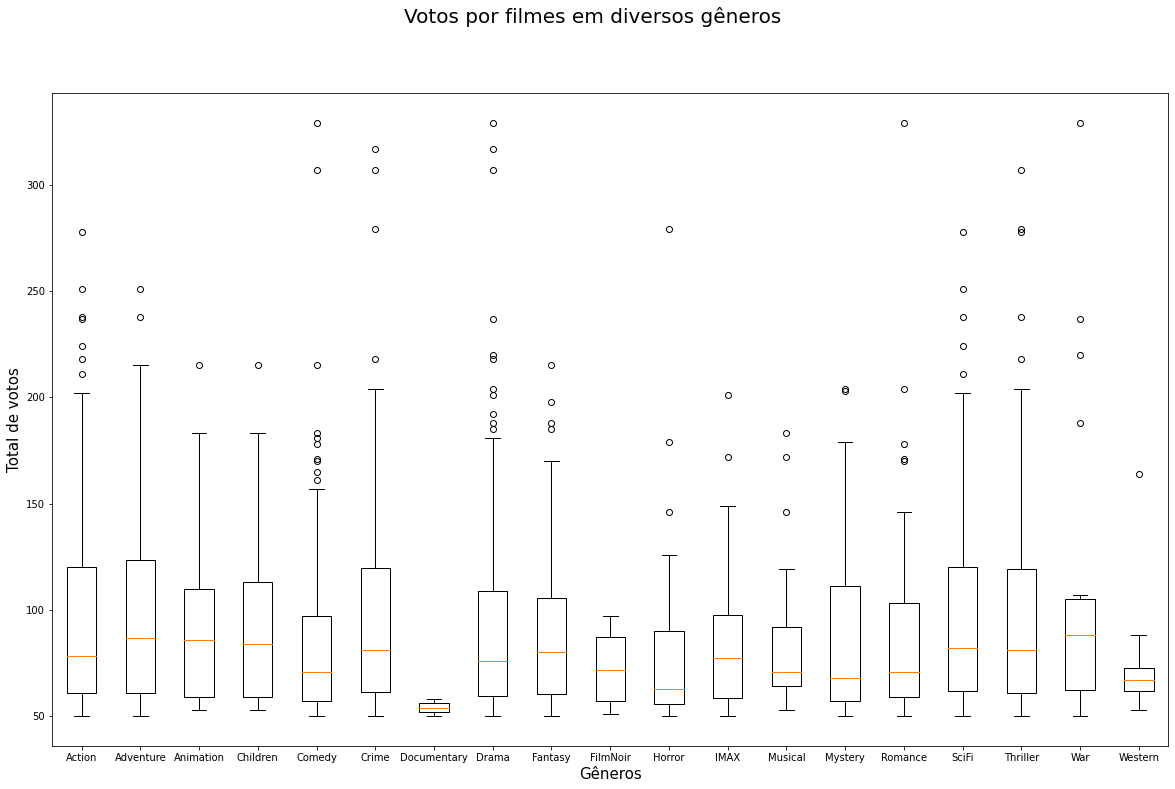

In [108]:
fig = plt.figure(figsize=(20,12))
plt.suptitle('Votos por filmes em diversos gêneros', fontsize = 20)
plt.ylabel('Total de votos', fontsize = 15)
plt.xlabel('Gêneros', fontsize = 15)

grupo = generos.columns
plt.boxplot([filmes[filmes[x] > 0].total_de_votos for x in grupo], labels=generos.columns)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: Adventure é um gênero cujos filmes, em média, possuem mais votos do que os filmes do gênero horror.
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Número de filmes do gênero Adventure por quantidade de votos')

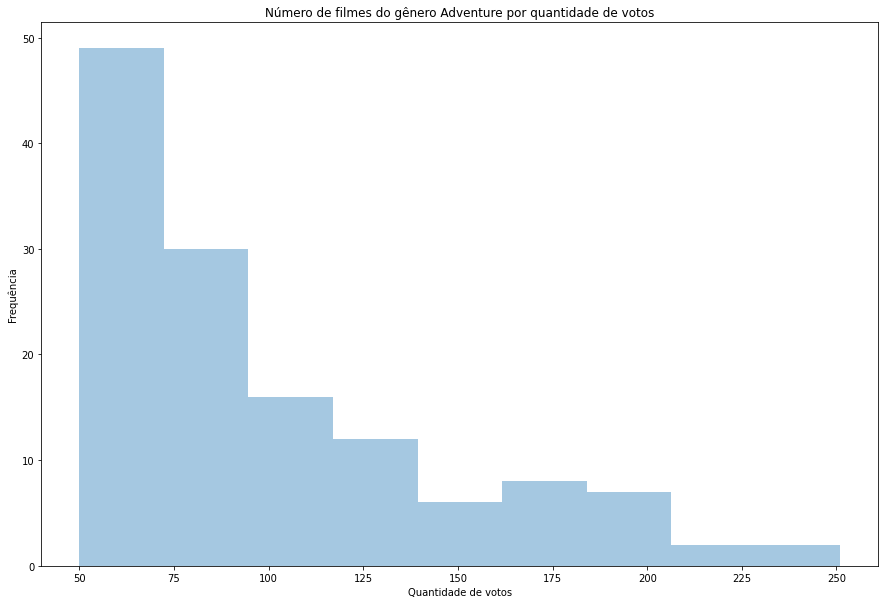

In [109]:
# solucao histograma de aventura

ax = sns.distplot(adventure.total_de_votos, kde=False, norm_hist=False)

ax.figure.set_size_inches(15, 10)
ax.set(xlabel='Quantidade de votos', ylabel='Frequência')
ax.set_title('Número de filmes do gênero Adventure por quantidade de votos')


Text(0.5, 1.0, 'Número de filmes do gênero Horror por quantidade de votos')

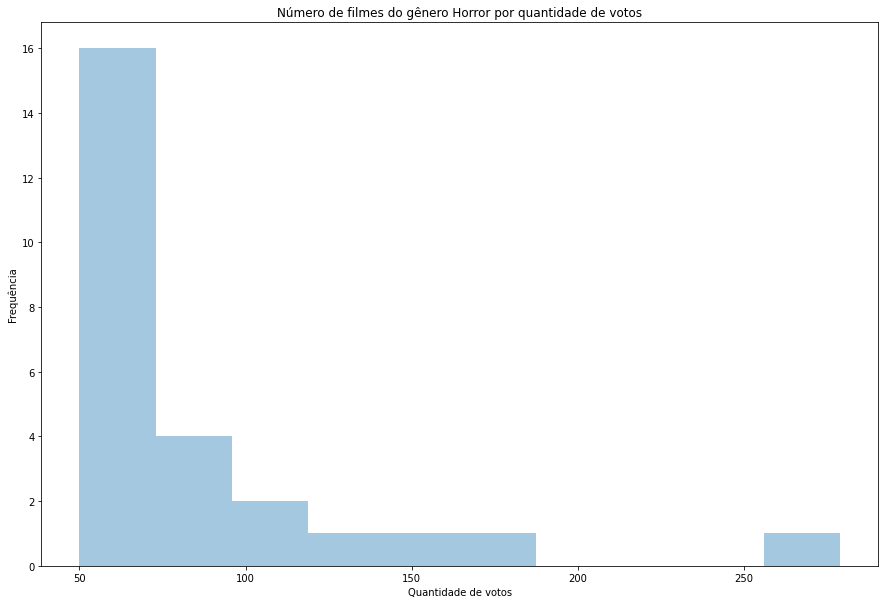

In [110]:
# solucao histograma de horror

ax = sns.distplot(horror.total_de_votos, kde=False, norm_hist=False)

ax.figure.set_size_inches(15, 10)
ax.set(xlabel='Quantidade de votos', ylabel='Frequência')
ax.set_title('Número de filmes do gênero Horror por quantidade de votos')

In [111]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, teste_norm_horror = scipy.stats.normaltest(horror.total_de_votos)
_, teste_norm_adventure = scipy.stats.normaltest(adventure.total_de_votos)

teste_norm_adventure, teste_norm_horror

# Com P-valor muito abaixo de 0.05 para ambos, podemos descartar a hipótese nula. Ou seja, Adventure e Horror não vem de distribuição paramétrica. 
# Sendo assim, deve-se aplicar um teste para distribuições não paramétricas. 
# Vale lembrar que a fisualização das distribuições de ambos os gêneros já indicavam uma distribuição que não era normal.


(5.987863006199139e-06, 1.2786148884334685e-07)

In [112]:
# solução com o teste desejado

_, p = scipy.stats.ranksums(adventure.total_de_votos, horror.total_de_votos)
p

0.04782366231999856

### Solução (explique sua conclusão): O 'normaltest' aplicado nos totais de votos dos gêneros adventure e horror indicou que se tratavam de distribuições não paramétricas, algo que já era esparado devido às visualizações das distribuições. Sendo assim, o teste desejado é o 'ranksums', utilizado em distribuições não paramétricas. O p-valor obtido com o teste desejado foi abaixo de 0.05. Sendo assim, podemos descartar a hipótese nula e considerar que a distribuição dos votos por filmes, em geral, são diferentes.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

{'boxes': [<matplotlib.lines.Line2D at 0x7efc872f4e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc87282860>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efc8728c320>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efc87282f60>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efc87282160>,
  <matplotlib.lines.Line2D at 0x7efc8728cda0>]}

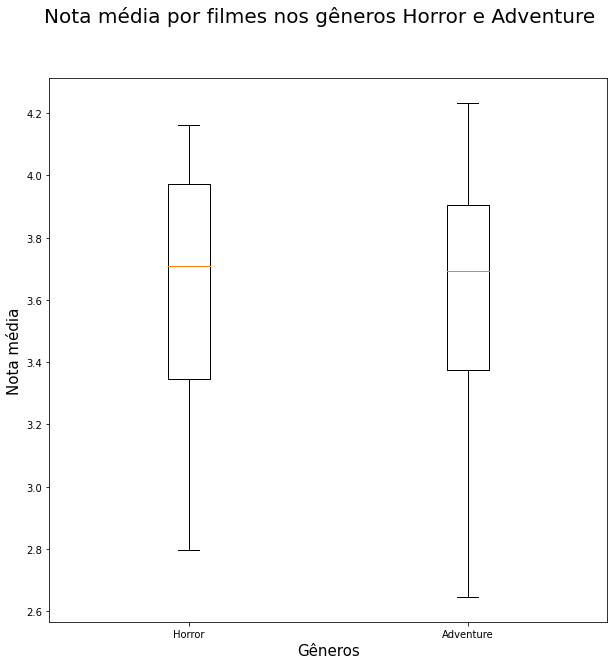

In [113]:
# solução:

plt.figure(figsize=(10, 10))
plt.suptitle('Nota média por filmes nos gêneros Horror e Adventure', fontsize = 20)
plt.ylabel('Nota média', fontsize = 15)
plt.xlabel('Gêneros', fontsize = 15)

plt.boxplot([horror.nota_media, adventure.nota_media], labels=['Horror', 'Adventure'])


{'boxes': [<matplotlib.lines.Line2D at 0x7efc87279be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7efc87209630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efc872170f0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7efc87209d30>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7efc87279f28>,
  <matplotlib.lines.Line2D at 0x7efc870ca630>]}

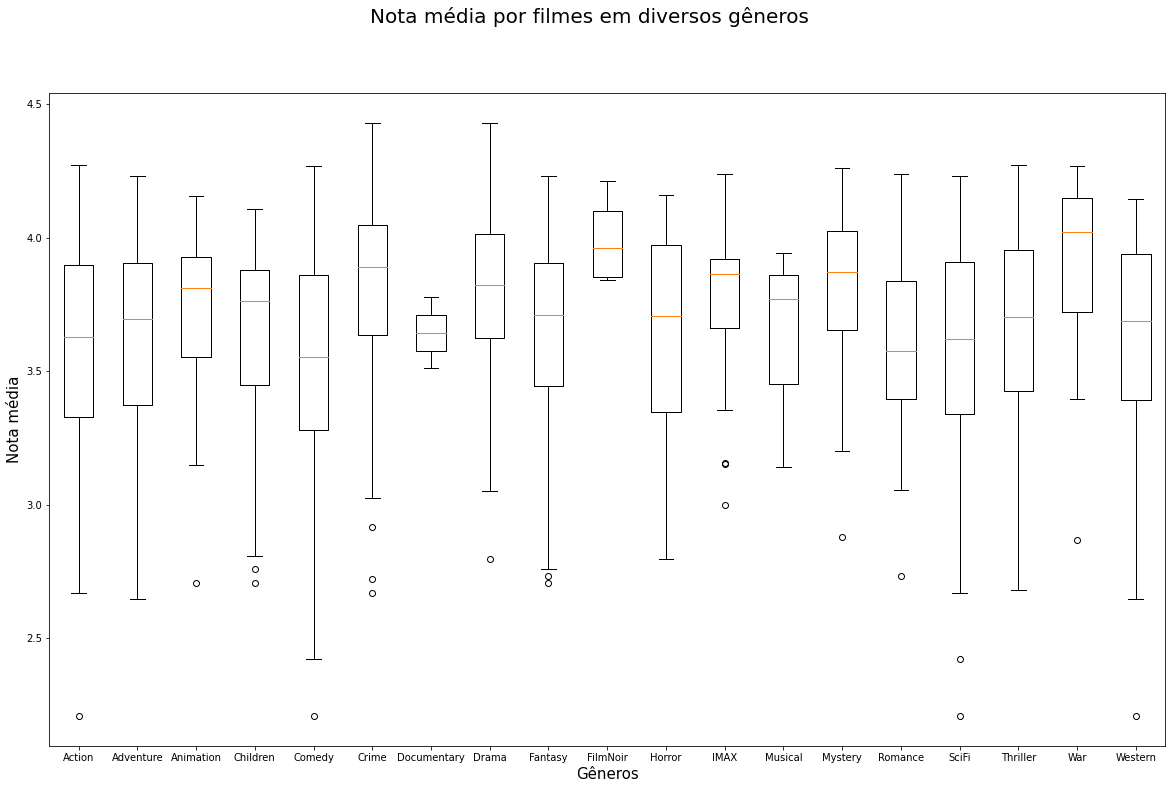

In [114]:
fig = plt.figure(figsize=(20,12))
plt.suptitle('Nota média por filmes em diversos gêneros', fontsize = 20)
plt.ylabel('Nota média', fontsize = 15)
plt.xlabel('Gêneros', fontsize = 15)

grupo = generos.columns
plt.boxplot([filmes[filmes[x] > 0].nota_media for x in grupo], labels=generos.columns)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução: Ao comparar os dois boxplots, parece que as notas médias dos filmes do gênero horror são maiores em comparação ao gênero adventure. Isso pode ser confirmado por testes estatísticos que comparem as duas médias



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 1.0, 'Nota média dos filmes do gênero Adventure por quantidade de votos')

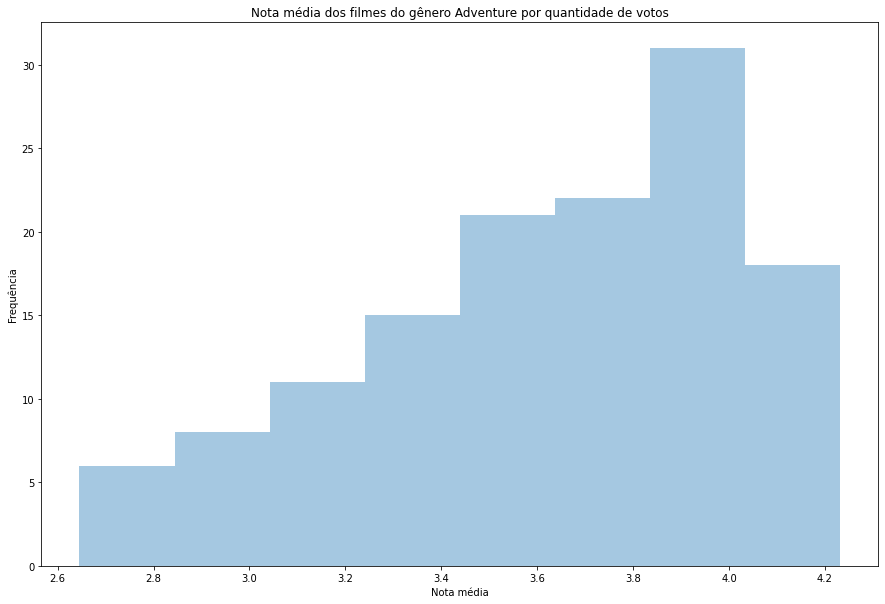

In [115]:
# solucao histograma de aventura

ax = sns.distplot(adventure.nota_media, kde=False, norm_hist=False)

ax.figure.set_size_inches(15, 10)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Nota média dos filmes do gênero Adventure por quantidade de votos')

Text(0.5, 1.0, 'Nota média dos filmes do gênero Horror por quantidade de votos')

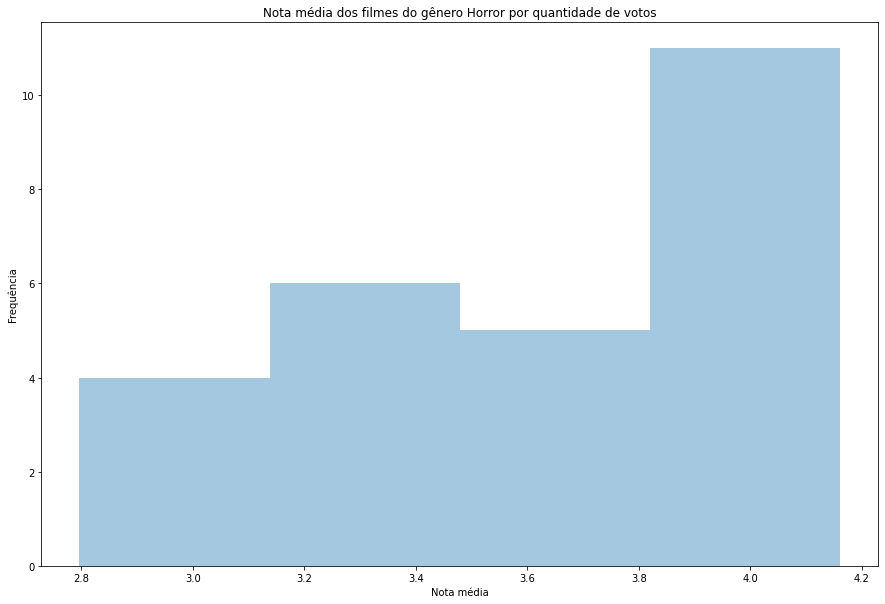

In [116]:
# solucao histograma de horror

ax = sns.distplot(horror.nota_media, kde=False, norm_hist=False)

ax.figure.set_size_inches(15, 10)
ax.set(xlabel='Nota média', ylabel='Frequência')
ax.set_title('Nota média dos filmes do gênero Horror por quantidade de votos')


In [117]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p_adventure = scipy.stats.normaltest(adventure.nota_media)
_, p_horror = scipy.stats.normaltest(horror.nota_media)

p_adventure, p_horror


(0.012835697582553224, 0.21186284682483916)

In [118]:
# solução com o teste desejado

from statsmodels.stats.weightstats import DescrStatsW

descr_adventure = DescrStatsW(adventure.nota_media)
descr_horror = DescrStatsW(horror.nota_media)
comparacao = descr_adventure.get_compare(descr_horror)
comparacao.summary(use_t=True)


,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução: Não, pois com o p-valor obtido no teste não é possível descartar a hipótese nula. Ou seja, não podemos generalizar que há uma diferença entre as notas médias nos gêneros.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução: Adventure. Embora não haja, em nossa amostra, evidência estatística de que os filmes possuem notas médias diferentes, há evidência de que o gênero adventure, em geral, seja mais votado.



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [119]:
votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

In [120]:
# solução: calculando os 2 generos mais votados

votos_por_genero[:2]


Action    15734.0
Drama     15445.0
dtype: float64

In [121]:
# solução: encontrando os top 5 filmes desses generos

generos_mais_votado = filmes.query('Action==1 or Drama==1')
top5_filmes_dos_generos_mais_votados = generos_mais_votado.sort_values(by = 'nota_media', ascending=False)[['titulo', 'nota_media', 'total_de_votos', 'Action', 'Drama']][:5]
top5_filmes_dos_generos_mais_votados


,titulo,nota_media,total_de_votos,Action,Drama
filmeId,,,,,
318,"Shawshank Redemption, The (1994)",4.429022,317.0,0,1
858,"Godfather, The (1972)",4.289062,192.0,0,1
2959,Fight Club (1999),4.272936,218.0,1,1
1276,Cool Hand Luke (1967),4.271930,57.0,0,1
1221,"Godfather: Part II, The (1974)",4.259690,129.0,0,1


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [122]:
# solucao

correlacao_generos_nota_media = filmes.corr()
correlacao_generos_nota_media = correlacao_generos_nota_media['nota_media'][generos.columns].sort_values(ascending=False)
correlacao_generos_nota_media
generos_correlacao = list(correlacao_generos_nota_media.head(2).index)

print('Os dois gêneros de maior correção são: {} e {}'.format(generos_correlacao[0], generos_correlacao[1]))

Os dois gêneros de maior correção são: Drama e Crime


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [123]:
# solucao

correlacao_generos_nota_media = filmes.corr()
correlacao_generos_nota_media = correlacao_generos_nota_media['nota_media'][generos.columns].sort_values(ascending=False)
correlacao_generos_nota_media
generos_correlacao = list(correlacao_generos_nota_media.tail(2).index)

print('Os dois gêneros de menor correção são: {} e {}'.format(generos_correlacao[0], generos_correlacao[1]))

Os dois gêneros de menor correção são: Action e Comedy


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

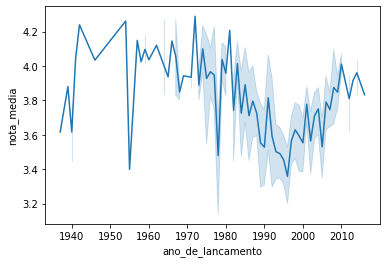

In [124]:
# solucao

sns.lineplot(data=filmes, y='nota_media', x='ano_de_lancamento', )

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [125]:
# solução (código)

filmes.corr()['ano_de_lancamento']['nota_media']

-0.1591455520444448

### Solução: Os dados coletados podem sofrer influência de várias coisas, inclusive do período. Em filmes mais recentes, por exemplo, pode ser que somente um determinado tipo de público tenha assistido. Com o tempo o filme se populariza e mais informações podem ser coletadas. Outra característica que pode causar uma falsa ideia de correlação entre duas variáveis é quando a correlação é causada, na verdade, por uma terceira variável.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.07, 'Gráficos de dispersão com regressão linear entre 3 variáveis')

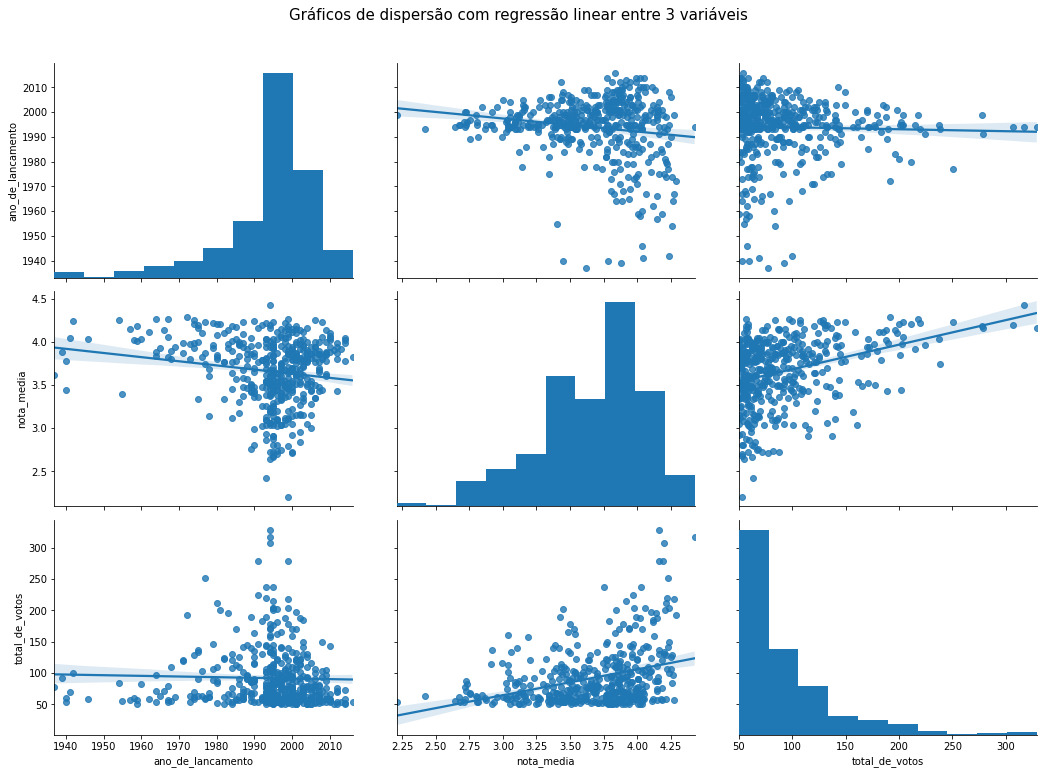

In [126]:
# solução

infos = ['ano_de_lancamento', 'nota_media', 'total_de_votos']

ax = sns.pairplot(data=filmes, y_vars=infos, x_vars=infos, kind='reg')

ax.fig.set_size_inches(15, 10)
ax.fig.suptitle('Gráficos de dispersão com regressão linear entre 3 variáveis', fontsize = 15, y = 1.07)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.07, 'Gráficos de dispersão com regressão linear entre 3 variáveis')

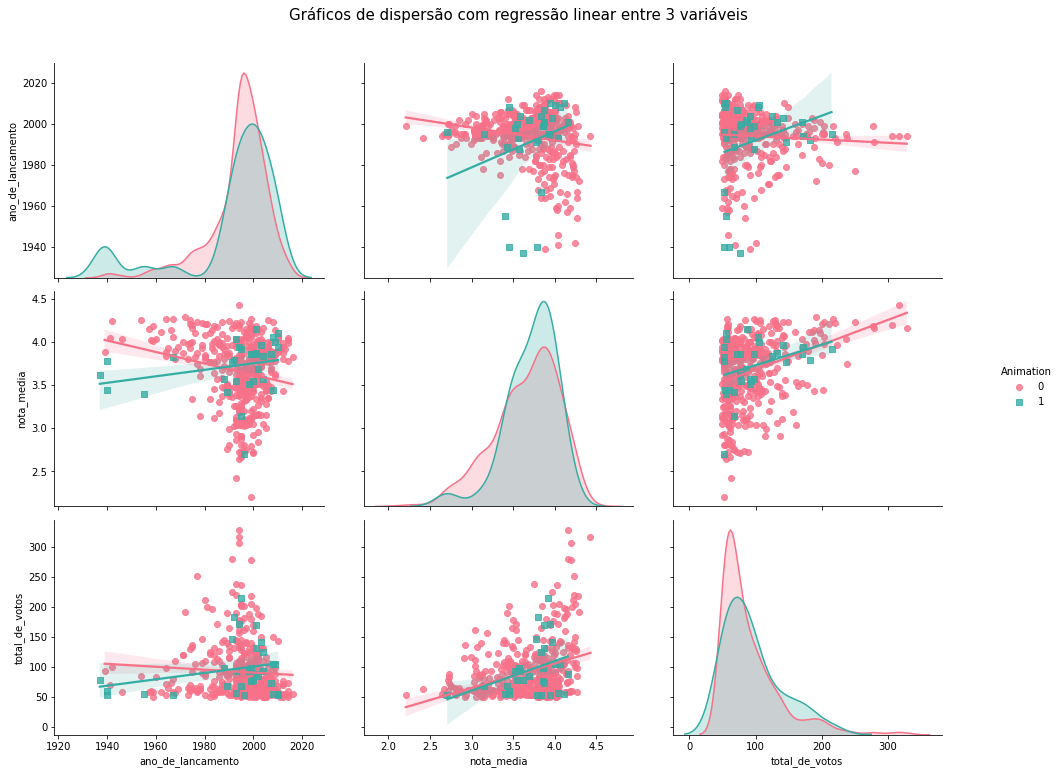

In [127]:

ax = sns.pairplot(data=filmes, y_vars=infos, x_vars=infos, kind='reg', palette="husl", hue='Animation', markers=["o", "s"])

ax.fig.set_size_inches(15,10)
ax.fig.suptitle('Gráficos de dispersão com regressão linear entre 3 variáveis',fontsize=15, y=1.07)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

Embora a quantidade de dados aparenta ser pequena, parece haver uma correlação linear levemente positiva em filmes de Animation, com novos filmes tendendo a ter notas médias um pouco maiores do que filmes mais antigos.

Quanto ao ano de lançamento x total de votos, também parece haver uma correlação levemente positiva, com os dados um pouco mais dispersos, indicando uma possível menor correlação se comparado ao ano de lançamento x nota média.

Quando olhamos a correlação dos gêneros, em geral, percebemos que, ao contrário de Animation, há uma correlação levemente negativa tanto em ano de lançamento x total de votos, quanto em ano de lançamento x nota média.

Minha hipótese é que, diferente dos demais gêneros em geral, Animation parece ser uma categoria que vem crescendo tanto em nota média, quanto em número de votos, ao longo do tempo.





## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

### Embora 'war' seja uma categoria com muitos votos por filmes, ao olhar os gráficos de correlação, parece que há uma diminuição da nota média para filmes dessa categoria ao longo do tempo. A correlação entre total de votos x ano de lançamento nessa categória parece ter baixa correlação, mas também é levemente negativa.

Text(0.5, 1.07, 'Gráficos de dispersão com regressão linear entre 3 variáveis')

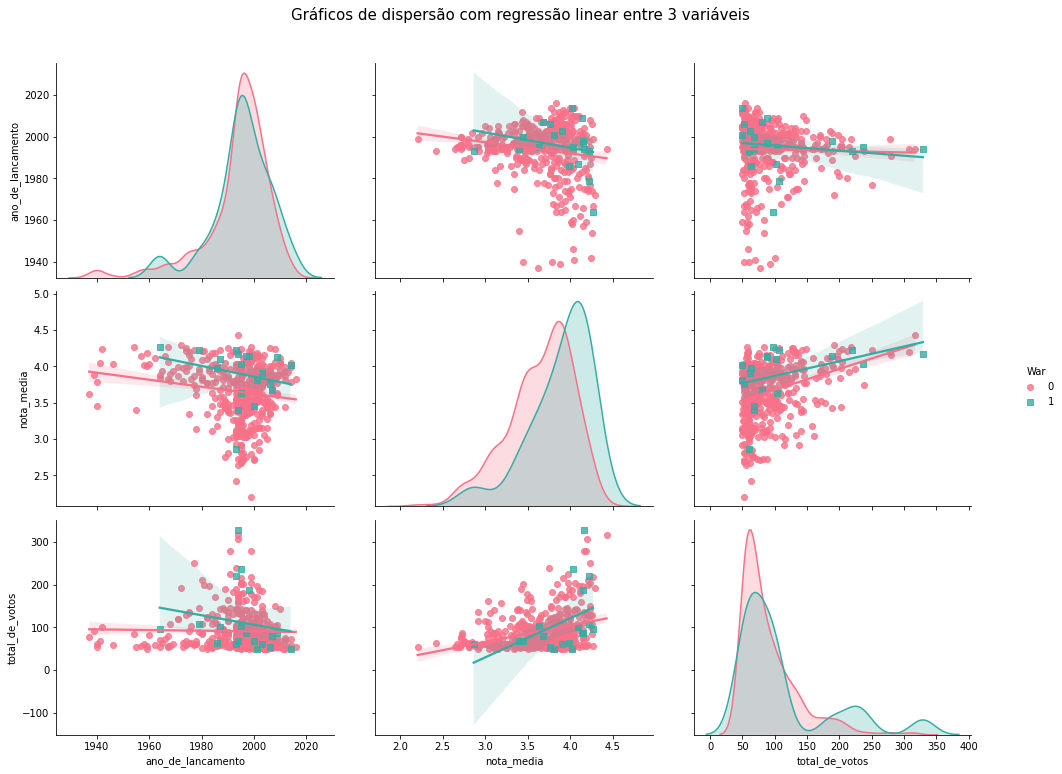

In [128]:
# solução

ax = sns.pairplot(data=filmes, y_vars=infos, x_vars=infos, kind='reg', palette="husl", hue='War', markers=["o", "s"])

ax.fig.set_size_inches(15,10)
ax.fig.suptitle('Gráficos de dispersão com regressão linear entre 3 variáveis',fontsize=15, y=1.07)

### Esse gráfico indica que, pela nossa amostra, houve uma quantidade muito grande de filmes entre 1990 e 2000. Entretanto é válido que há outros filmes produzidos que não se encontram na amostra.

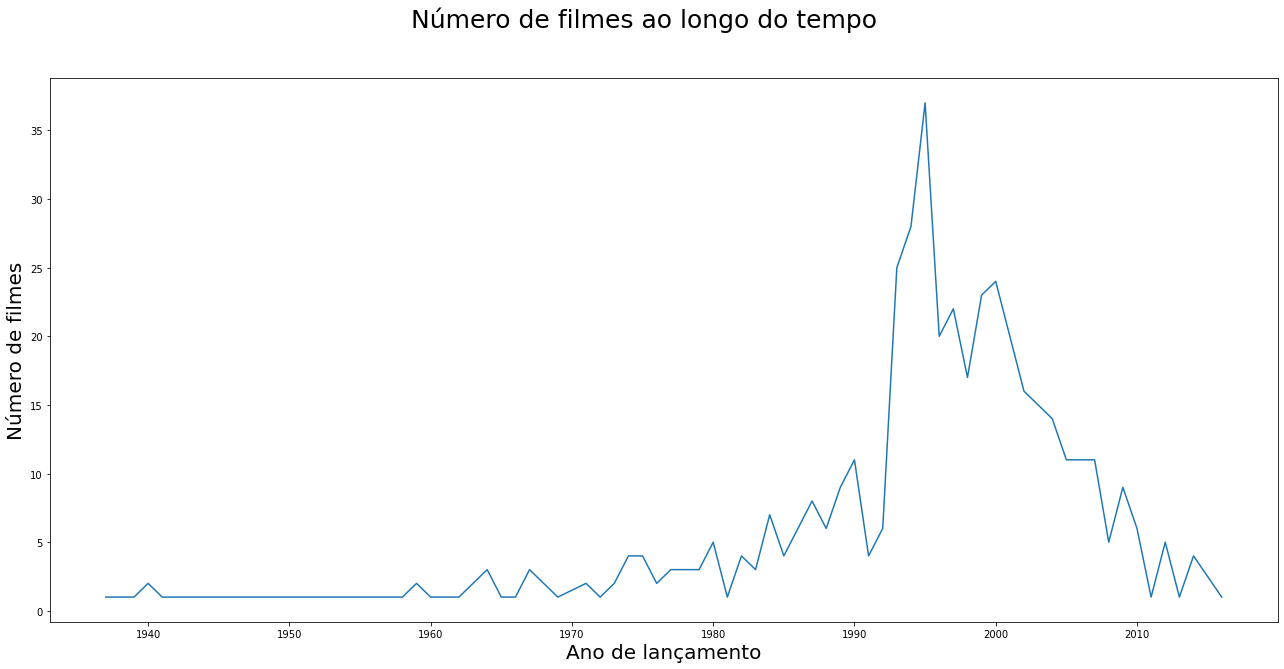

In [129]:
filmes_por_ano = filmes.groupby('ano_de_lancamento').count()['titulo']

plt.figure(figsize=(22, 10))
plt.suptitle('Número de filmes ao longo do tempo', fontsize=25)
plt.ylabel('Número de filmes', fontsize=20)
plt.xlabel('Ano de lançamento', fontsize=20)

plt.plot(filmes_por_ano)